# Time Series Forecasting using Prophet

## Objective
To build a more flexible time series forecasting model using Facebook Prophet
that can better capture trend changes and seasonality in Bitcoin prices.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from prophet import Prophet

In [6]:
df = pd.read_csv(
    "../data/processed/btc_usd_cleaned.csv",
    index_col=0,
    parse_dates=True
)

df.head()


,Close,Volume
Price,,
2019-01-01,3843.520020,4324200990
2019-01-02,3943.409424,5244856836
2019-01-03,3836.741211,4530215219
2019-01-04,3857.717529,4847965467
2019-01-05,3845.194580,5137609824


In [7]:
df_reset = df.reset_index()
df_reset.head()



,Price,Close,Volume
0,2019-01-01,3843.520020,4324200990
1,2019-01-02,3943.409424,5244856836
2,2019-01-03,3836.741211,4530215219
3,2019-01-04,3857.717529,4847965467
4,2019-01-05,3845.194580,5137609824


In [9]:
prophet_df = df_reset.rename(columns={
    'Price': 'ds',
    'Close': 'y'
})[['ds', 'y']]

prophet_df.head()


,ds,y
0,2019-01-01,3843.520020
1,2019-01-02,3943.409424
2,2019-01-03,3836.741211
3,2019-01-04,3857.717529
4,2019-01-05,3845.194580


In [10]:
train_size = int(len(prophet_df) * 0.8)

train_prophet = prophet_df.iloc[:train_size]
test_prophet = prophet_df.iloc[train_size:]

len(train_prophet), len(test_prophet)


(2053, 514)

In [11]:
from prophet import Prophet

model = Prophet(
    daily_seasonality=True,
    weekly_seasonality=True,
    yearly_seasonality=True
)

model.fit(train_prophet)


20:34:53 - cmdstanpy - INFO - Chain [1] start processing
20:34:55 - cmdstanpy - INFO - Chain [1] done processing


In [12]:
future = model.make_future_dataframe(periods=len(test_prophet))
forecast = model.predict(future)

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()


,ds,yhat,yhat_lower,yhat_upper
0,2019-01-01,-2264.435080,-7640.218255,3412.736940
1,2019-01-02,-1966.443747,-7734.148265,3901.597420
2,2019-01-03,-1821.915146,-7023.546571,3653.284636
3,2019-01-04,-1644.256562,-7562.058953,4011.521847
4,2019-01-05,-1478.396454,-6943.347579,4159.563591


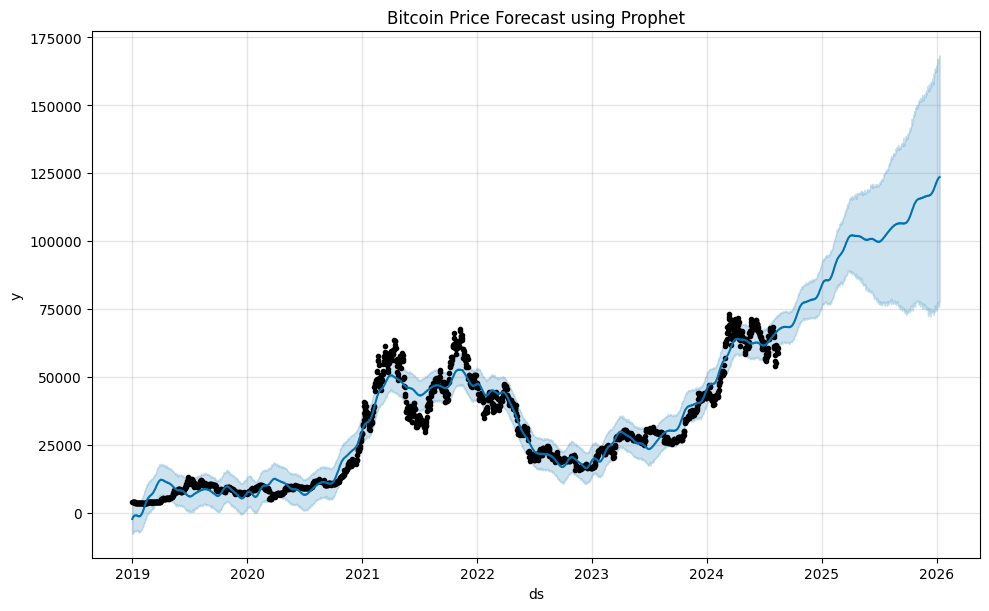

In [13]:
model.plot(forecast)
plt.title("Bitcoin Price Forecast using Prophet")
plt.show()


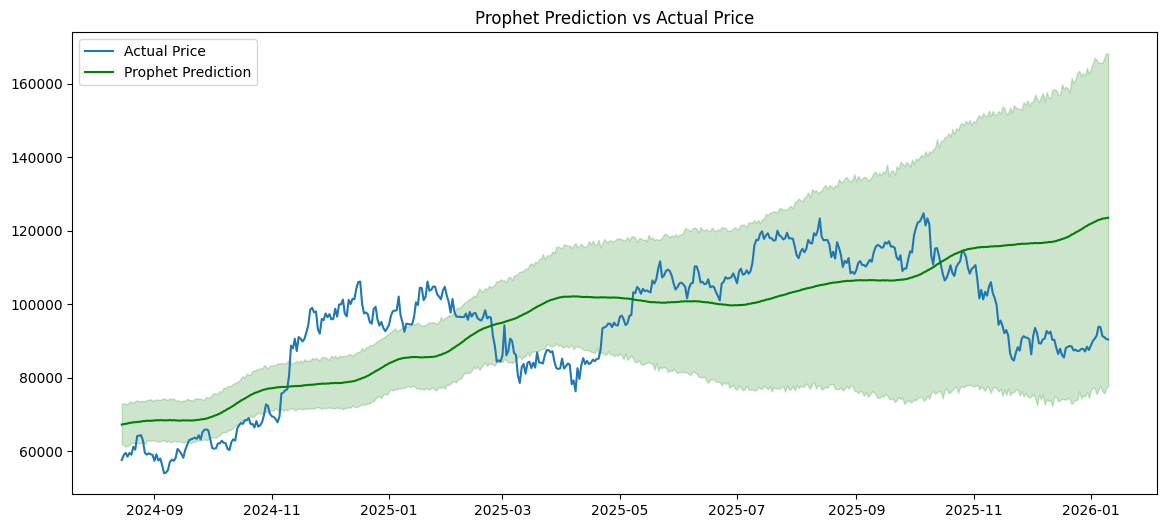

In [14]:
forecast_test = forecast.iloc[train_size:]

plt.figure(figsize=(14,6))
plt.plot(test_prophet['ds'], test_prophet['y'], label='Actual Price')
plt.plot(forecast_test['ds'], forecast_test['yhat'], label='Prophet Prediction', color='green')
plt.fill_between(
    forecast_test['ds'],
    forecast_test['yhat_lower'],
    forecast_test['yhat_upper'],
    color='green',
    alpha=0.2
)
plt.title("Prophet Prediction vs Actual Price")
plt.legend()
plt.show()


In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

rmse_prophet = np.sqrt(mean_squared_error(test_prophet['y'], forecast_test['yhat']))
mae_prophet = mean_absolute_error(test_prophet['y'], forecast_test['yhat'])

print("Prophet RMSE:", rmse_prophet)
print("Prophet MAE:", mae_prophet)


Prophet RMSE: 14636.17522802943
Prophet MAE: 12289.016522764214


In [16]:
prophet_forecast = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
prophet_forecast.to_csv("../data/processed/prophet_forecast.csv", index=False)

print("Prophet forecast saved successfully.")


Prophet forecast saved successfully.
